# K-means & Hierarchical clustering 
By ABIDINE M'hamed Bilal

This case requires developing a customer segmentation to define marketing strategy. The sample Dataset summarizes the usage behavior of about 9000 active credit cardholders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset :
CUST_ID: Identification of Credit Cardholder (Categorical)
BALANCE: Balance amount left in their account to make purchases (BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated) 
PURCHASES: Amount of purchases made from the account.
ONEOFF_PURCHASES: Maximum purchase amount done in one go
INSTALLMENTS_PURCHASES: Amount of purchase done in installment
CASH_ADVANCE: Cash in advance given by the user
PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
ONEOFFPURCHASESFREQUENCY: How frequently Purchases are happening in one go (1 = frequently purchased, 0 = not frequently purchased)
PURCHASESINSTALLMENTSFREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
CASHADVANCEFREQUENCY: How frequently the cash in advance is being paid 
CASHADVANCETRX: Number of Transactions made with "Cash in Advanced" PURCHASES_TRX: Number of purchase transactions made
CREDIT_LIMIT: Limit of Credit Card for user 
PAYMENTS: Amount of Payment done by userMINIMUM_PAYMENTS: Minimum amount of payments made by user PRCFULLPAYMENT: Percent of full payment paid by userTENURE: Tenure of credit card service for user


# 1.Load dataset

In [94]:
import pandas as pd
import seaborn as sns;
from sklearn.preprocessing import LabelEncoder
# making data frame from csv file 
df=pd.read_csv('CC GENERAL.csv')
df.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [95]:
# Count the number of rows and columns in the dataset
df.shape

(8950, 18)

# Data Cleaning

In [96]:
## let's see the columns with nas
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [97]:
# We fill the na's on the dataset with the mean of each columns 
mp_mean = df['MINIMUM_PAYMENTS'].mean()
df['MINIMUM_PAYMENTS'].fillna(value = mp_mean, inplace = True)
df['CREDIT_LIMIT'].fillna(value = mp_mean, inplace = True)

In [98]:
df.drop("CUST_ID", axis = 1, inplace = True)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Visualisation

array([[<AxesSubplot:title={'center':'BALANCE'}>,
        <AxesSubplot:title={'center':'BALANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'PURCHASES'}>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES'}>],
       [<AxesSubplot:title={'center':'INSTALLMENTS_PURCHASES'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE'}>,
        <AxesSubplot:title={'center':'PURCHASES_FREQUENCY'}>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES_FREQUENCY'}>],
       [<AxesSubplot:title={'center':'PURCHASES_INSTALLMENTS_FREQUENCY'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_TRX'}>,
        <AxesSubplot:title={'center':'PURCHASES_TRX'}>],
       [<AxesSubplot:title={'center':'CREDIT_LIMIT'}>,
        <AxesSubplot:title={'center':'PAYMENTS'}>,
        <AxesSubplot:title={'center':'MINIMUM_PAYMENTS'}>,
        <AxesSubplot:title={'center':'PRC_FULL_PAYMENT'}>],
       [<AxesSubplot:title={'center':'TENURE'

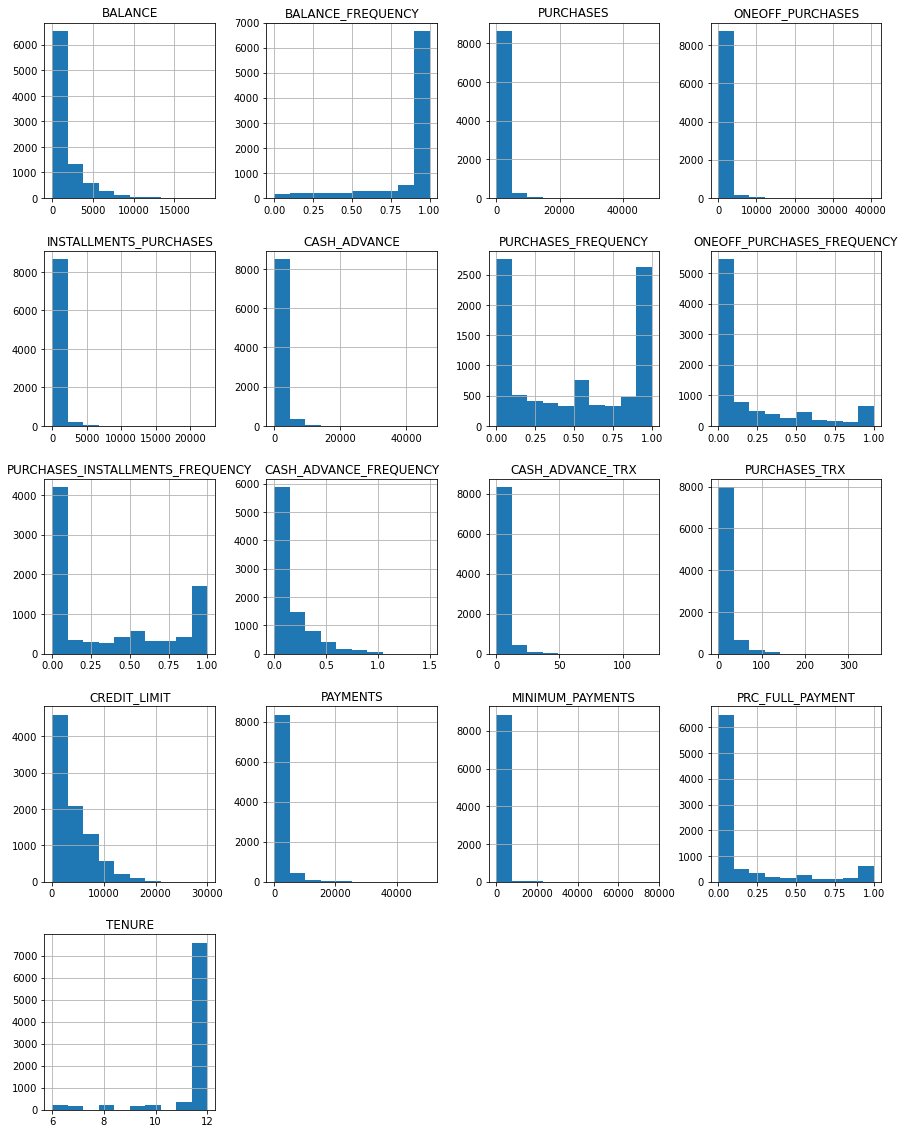

In [99]:
df.hist(figsize = (15,20))

In [100]:
#This method is used to get a summary of statistics in the dataset.
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.043837,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.814746,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Standardize the Data
PCA is effected by scale so you need to scale the features in your data before applying PCA. Use StandardScaler to help you standardize the dataset’s features onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms.

In [101]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df1 = scaler.fit_transform(df)
normalized_df = pd.DataFrame(df1, columns= df.columns)
normalized_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960268,-0.528979,-3.109675e-01,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688712,0.818642,8.931021e-02,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826127,-0.383805,-1.016632e-01,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826127,-0.598688,-4.390474e-16,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905302,-0.364368,-2.657913e-01,-0.525551,0.36068


# PCA Projection to 2D

In [102]:
from sklearn.decomposition import PCA
# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
X_principal.head(6)

,P1,P2
0,-1.682258,-1.076313
1,-1.138105,2.506569
2,0.969745,-0.383517
3,-0.873568,0.043213
4,-1.599441,-0.688428
5,0.251270,-0.780011


# 2. Plot the dendrogram. 


Hierarchical clustering also known as hierarchical cluster analysis (HCA) is also a method of cluster analysis which seeks to build a hierarchy of clusters without having fixed number of cluster.

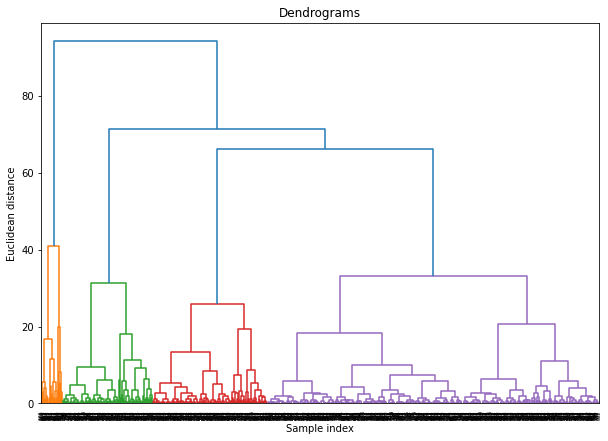

In [147]:
# Dendograms are used to divide a given cluster into many different clusters
import scipy.cluster.hierarchy as shc
plt.figure(figsize =(10, 7)) 
plt.title('Dendrograms') 
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')

Dendrogram = shc.dendrogram(shc.linkage(X_principal[1:1000], method ='ward')) 

# Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward'))) 

By looking at the above dendrogram, we divide the data into three clusters.

# 3. Use hierarchical clustering to identify the inherent groupings within your data
In hierarchical clustering one can stop at any number of clusters, one find appropriate by interpreting the dendrogram.

In [110]:
# linkage{‘ward’, ‘complete’, ‘average’, ‘single’}, default=’ward’
# ‘ward’ minimizes the variance of the clusters being merged.
#‘complete’ or ‘maximum’ linkage uses the maximum distances between all observations of the two sets.

# Ward’s-linkage: Ward’s method or minimum variance method or Ward’s minimum variance clustering method 
# calculates the distance between two clusters as the increase in the error sum of squares after merging
# two clusters into a single cluster. This method seeks to choose the successive clustering steps so as to
# minimize the increase in sum of squares error at each step.

from sklearn.cluster import AgglomerativeClustering #Importing our clustering algorithm : Agglomerative
import matplotlib.pyplot as plt
model=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
clust_labels=model.fit_predict(X_principal)  #Applying agglomerative algorithm with 5 clusters, using euclidean distance as a metric


# 4. Plot the clusters.

Text(0.5, 1.0, 'Visualisation of clusters')

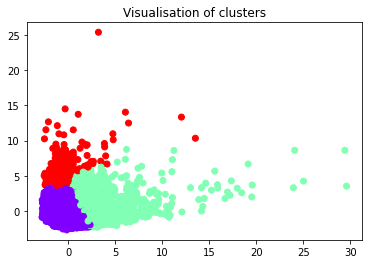

In [115]:
# plt.scatter(X_principal.P1,X_principal.P2, c=clust_labels, cmap='rainbow')
plt.scatter(X_principal.P1,X_principal.P2, c=clust_labels, cmap ='rainbow')
plt.title('Visualisation of clusters')

#cmap =plt.cm.winter
#clusters = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
#clusters.fit_predict(X)
#print(clusters.labels_)
#plt.scatter(X[:,0],X[:,1], c=clusters.labels_, cmap='rainbow')

In [33]:
agglomerative=pd.DataFrame(clust_labels)
agglomerative

,0
0,0
1,0
2,0
3,0
4,0
...,...
8945,0
8946,0
8947,0
8948,0


# 5. Use k-means clustering
k-means is method of cluster analysis using a pre-specified no. of clusters. It requires advance knowledge of ‘K’


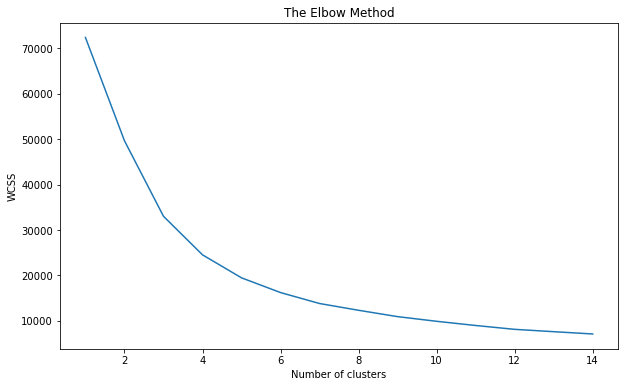

In [126]:
# Try different k values and select the best one
plt.figure(figsize=(10,6))
from sklearn.cluster import KMeans   #Importing our clustering algorithm: KMeans
wcss = []
for i in range(1, 15):
    #Cluster our data by choosing 5 as number of clusters
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 20)
    kmeans.fit(X_principal)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


The optimal number of clusters corresponds to the optimal minimum value of SSE, in our case k=3.
Note here that the reason it is named the elbow method is that the optimum minimum value of SSE

In [127]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 20)
y_kmeans = kmeans.fit_predict(X_principal)
kmeans.cluster_centers_


array([[-0.55836619, -0.76096386],
       [ 3.98057896, -0.11051268],
       [-0.81268053,  2.9142117 ]])

In [131]:
labels=pd.DataFrame(kmeans.labels_)
labels[:8]

,0
0,0
1,2
2,0
3,0
4,0
5,0
6,1
7,0


# 6. Plot the clusters 

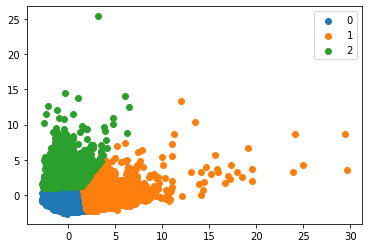

In [146]:
import numpy as np

# Visualizing the clustering 
#plt.scatter(X_principal['P1'], X_principal['P2'],  
          # c = AgglomerativeClustering(n_clusters = 3).fit_predict(X_principal), cmap =plt.cm.winter) 
#plt.show() 


u_labels = np.unique(y_kmeans)
 
#plotting the results:
label= y_kmeans
for i in u_labels:
    plt.scatter(X_principal.P1[label == i] , X_principal.P2[label == i] , label = i)
plt.legend()
plt.show()


#plt.title('Clusters of Customers')
#plt.xlabel('Annual Income(k$)')
#plt.ylabel('Spending Score(1-100')#
#plt.legend()



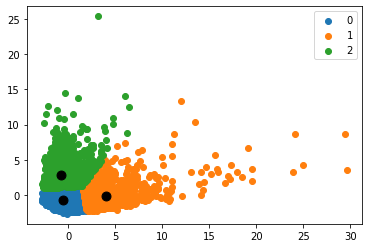

In [157]:
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    #plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
    plt.scatter(X_principal.P1[label == i] , X_principal.P2[label == i] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

In [158]:
centroids = kmeans.cluster_centers_
centroids
#centroids

array([[-0.55836619, -0.76096386],
       [ 3.98057896, -0.11051268],
       [-0.81268053,  2.9142117 ]])

# 7. Compare the two results. 

- In this case, both clustering algorithms did a great job finding the clusters but with slight differences at the edges of each cluster.
- k-Means may produce tighter clusters than hierarchical clustering.


# Conclusion:
I conclude that the three clusters which each corresponds probablement to Silver credit card,  Gold credit card, and  Platinum credit card